<a href="https://colab.research.google.com/github/diegoBarriaevolet/Diagrama-de-Flujo-evolet/blob/main/Proyecto_OSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
from google.colab import files

# 📥 Subir archivo desde tu equipo
uploaded = files.upload()

# 📄 Leer archivo Excel cargado
df = pd.read_excel('data sciense cabritas.xlsx')

# 👀 Mostrar primeras filas
df.head()



Saving data sciense cabritas.xlsx to data sciense cabritas (11).xlsx


,Producto,form_name,form_state,user_name,deleted,Hora,Disponibilidad,Precio,Local,Nombre_Form,...,Revisar,Reintegrar,CONCA VENDOR,Check_blanco,Empresa,Bloqueo_datos,Columna calculada 1,Maestra_FILTRA,CAMBIO,Supervisor
0,CARAMELO 161 G,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
1,DULCE 91GR,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
2,LIGHT MANTEQUILLA 85 G,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
3,MANTEQUILLA 91GR,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
4,NATURAL 91GR (CENCO),Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA


In [33]:
df[df['Disponibilidad'] == 0].groupby('Local').size().sort_values(ascending=False)

,0
Local,
LIDER EXPRESS TALCA (LAS RASTRAS) (L.764),178
LIDER HIPER ANTOFAGASTA (L.91),175
LIDER EXPRESS DOS SUR (L.142),175
LIDER HIPER COLIN SUCURSAL (L.143),171
SANTA ISABEL ANTOFAGASTA MAIPU (L.798),168
...,...
JUMBO BOSQUEMAR (L.739),5
UNIMARC GOMEZ CARREÑO (L.0713),4
JUMBO ARICA,3


In [40]:
from pickle import TRUE
df.groupby('Local').mean(numeric_only=True)['Disponibilidad'].sort_values(ascending=True)

,Disponibilidad
Local,
LIDER EXPRESS TALCA (LAS RASTRAS) (L.764),0.053191
LIDER EXPRESS DOS SUR (L.142),0.069149
LIDER EXPRESS LOS ANGELES (L.523),0.072222
LIDER HIPER ANTOFAGASTA (L.91),0.083770
LIDER HIPER SANTA ROSA GABRIELA (L.693),0.097561
...,...
JUMBO EL LLANO SUBERCASEAUX (L.513),0.971429
JUMBO CONCHA Y TORO J659 (L.659),0.975000
UNIMARC TEMUCO CAUPOLICAN (L.0906),0.977778


In [41]:
df[df['Disponibilidad'] == 0].groupby('Producto').size()


,0
Producto,
CARAMELO 161 G,3426
DULCE 91GR,3517
LIGHT MANTEQUILLA 85 G,6894
MANTEQUILLA 91GR,4897
NATURAL 91GR (CENCO),7419


In [42]:
df[df['Disponibilidad'] == 0].groupby('Cadena').size()


,0
Cadena,
HIPER LIDER,6490
JUMBO,2113
LIDER EXPRESS,1075
SANTA ISABEL,16374
UNIMARC,101


In [48]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar columnas relevantes
cols = ['Producto', 'Disponibilidad', 'Stock', 'Local', 'Cadena', 'Supervisor','Venta']
df_cluster = df[cols].dropna()

# Filtrar valores válidos
df_cluster = df_cluster[(df_cluster['Disponibilidad'].isin([0,1])) & (df_cluster['Stock'] >= 0)]

# Codificar variables categóricas
label_cols = ['Producto', 'Local', 'Cadena', 'Supervisor']
for col in label_cols:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])


In [49]:
from sklearn.cluster import KMeans

# KMeans con 3 grupos (puedes cambiar el número de clústeres)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)


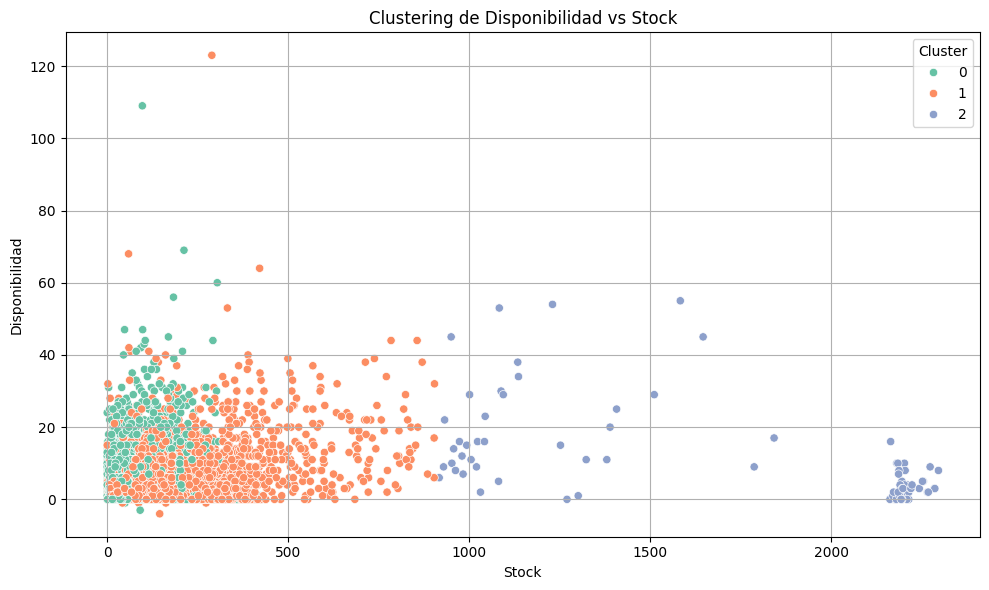

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Stock', y='Venta', hue='Cluster', palette='Set2')
plt.title('Clustering de Disponibilidad vs Stock')
plt.xlabel('Stock')
plt.ylabel('Disponibilidad')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='Disponibilidad', ylabel='Stock'>

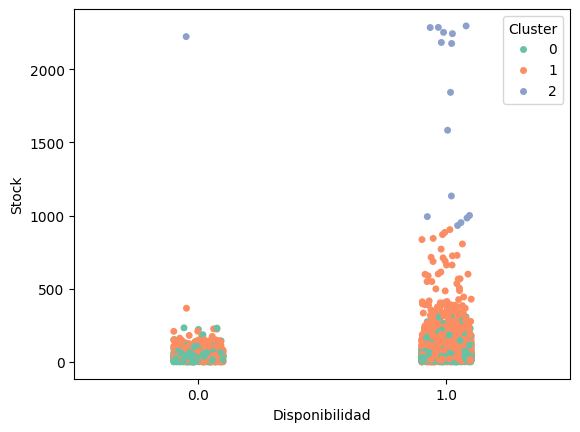

In [77]:
sns.stripplot(data=df_cluster.sample(10000), y="Stock", x="Disponibilidad", hue="Cluster",palette='Set2')


In [78]:
# Seleccionar y limpiar los datos
df_cluster = df[['Stock', 'Venta']].dropna()
df_cluster = df_cluster[(df_cluster['Stock'] >= 0) & (df_cluster['Venta'] >= 0)]

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

In [80]:
# Filtrar registros donde la disponibilidad es 0
df_disp0 = df[(df['Disponibilidad'] == 0) & (df['Stock'] >= 0)]

# Agrupar por local y calcular estadísticas de stock
stock_por_local = df_disp0.groupby('Local')['Stock'].agg(['count', 'mean', 'median', 'sum']).reset_index()

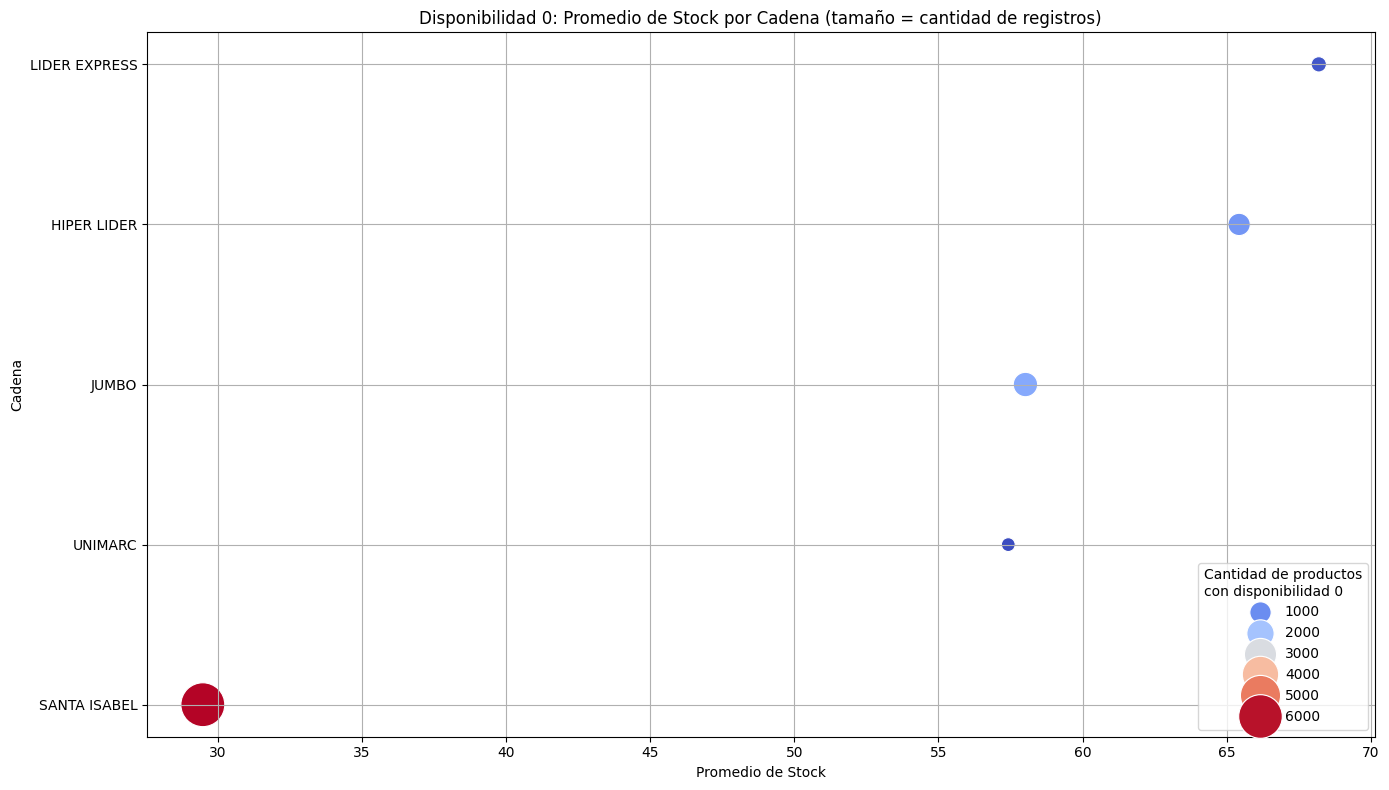

In [81]:
# Agrupar por Cadena en vez de Local
stock_por_cadena = df_disp0.groupby('Cadena')['Stock'].agg(['count', 'mean', 'median', 'sum']).reset_index()

# Ordenar por promedio de stock
stock_por_cadena = stock_por_cadena.sort_values('mean', ascending=False)

# Gráfico de burbujas
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=stock_por_cadena,
    x='mean',
    y='Cadena',
    size='count',
    hue='count',
    palette='coolwarm',
    sizes=(100, 1000),
    legend='brief'
)

plt.title('Disponibilidad 0: Promedio de Stock por Cadena (tamaño = cantidad de registros)')
plt.xlabel('Promedio de Stock')
plt.ylabel('Cadena')
plt.grid(True)
plt.legend(title='Cantidad de productos\ncon disponibilidad 0', loc='lower right')
plt.tight_layout()
plt.show()


Saving data sciense cabritas.xlsx to data sciense cabritas (14).xlsx


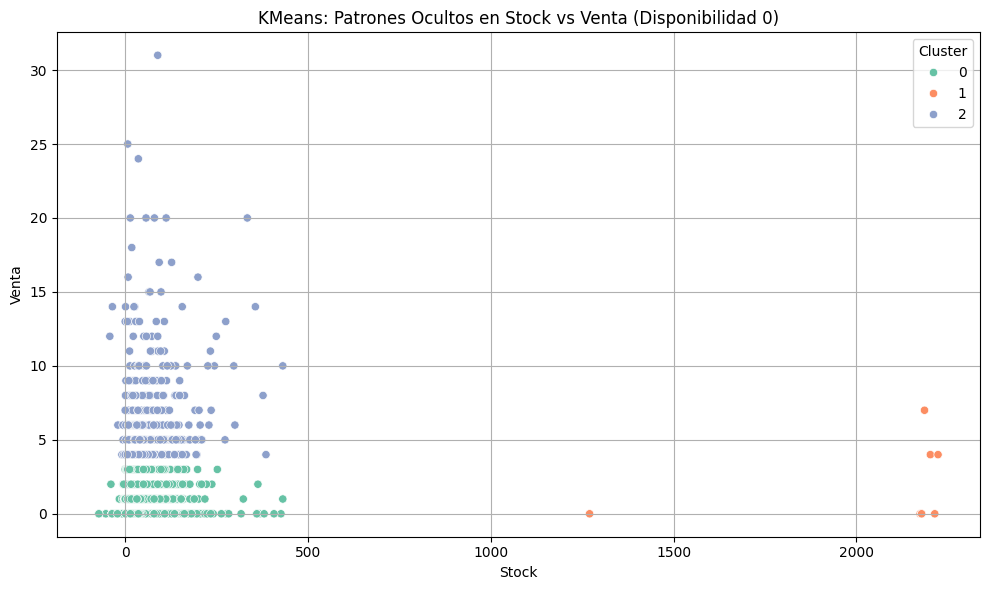

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir y cargar archivo
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# Filtrar Disponibilidad = 0 y columnas relevantes
df_cluster = df[df['Disponibilidad'] == 0][['Stock', 'Venta']].dropna()

df_cluster_1 = df[df['Disponibilidad'] == 1][['Stock', 'Venta']].dropna()


# Escalar para mejorar KMeans

escalar= StandardScaler()


X_scaled = escalar.fit_transform(df_cluster)

# Escalar para mejorar KMeans
X_scaled_1 = escalar.transform(df_cluster_1)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

df_cluster_1['Cluster'] = kmeans.predict(X_scaled_1)

# Gráfico con nombres de columnas reales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='Stock', y='Venta', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones Ocultos en Stock vs Venta (Disponibilidad 0)')
plt.xlabel('Stock')
plt.ylabel('Venta')
plt.grid(True)
plt.tight_layout()
plt.show()


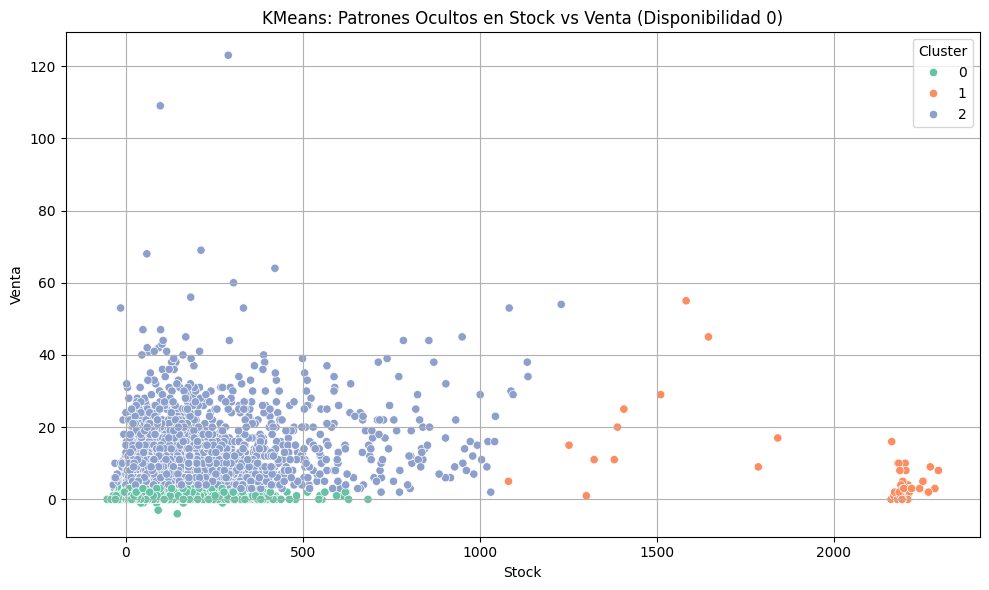

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster_1, x='Stock', y='Venta', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones Ocultos en Stock vs Venta (Disponibilidad 0)')
plt.xlabel('Stock')
plt.ylabel('Venta')
plt.grid(True)
plt.tight_layout()
plt.show()

Saving data sciense cabritas.xlsx to data sciense cabritas (15).xlsx


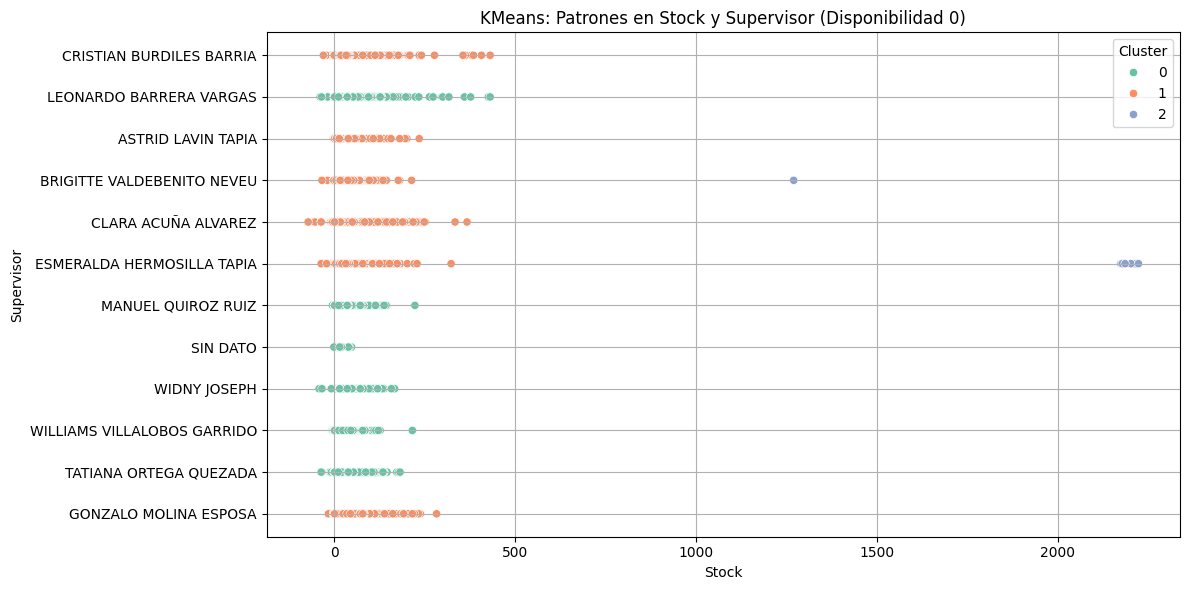

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# Filtrar datos con disponibilidad 0 y columnas necesarias
df_cluster = df[df['Disponibilidad'] == 0][['Stock', 'Supervisor']].dropna()

# Codificar Supervisor
le = LabelEncoder()
df_cluster['Supervisor_encoded'] = le.fit_transform(df_cluster['Supervisor'])

# Escalar variables
X = df_cluster[['Stock', 'Supervisor_encoded']]
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar con nombres reales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster, x='Stock', y='Supervisor', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones en Stock y Supervisor (Disponibilidad 0)')
plt.xlabel('Stock')
plt.ylabel('Supervisor')
plt.grid(True)
plt.tight_layout()
plt.show()


Saving data sciense cabritas.xlsx to data sciense cabritas (7).xlsx


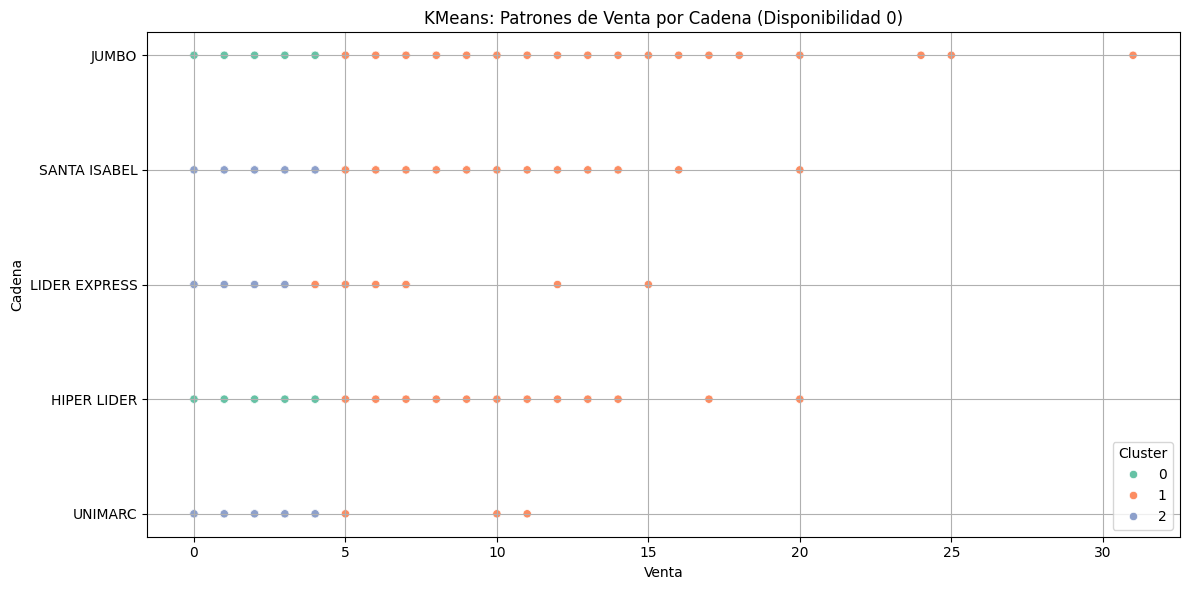

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📥 Subir archivo si no lo has hecho
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# 🔍 Filtrar datos con Disponibilidad = 0
df_cluster = df[df['Disponibilidad'] == 0][['Venta', 'Cadena']].dropna()

# 🔢 Codificar cadena
le = LabelEncoder()
df_cluster['Cadena_encoded'] = le.fit_transform(df_cluster['Cadena'])

# ⚙️ Escalar datos
X = df_cluster[['Venta', 'Cadena_encoded']]
X_scaled = StandardScaler().fit_transform(X)

# 🧠 KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Visualización con nombres reales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster, x='Venta', y='Cadena', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones de Venta por Cadena (Disponibilidad 0)')
plt.xlabel('Venta')
plt.ylabel('Cadena')
plt.grid(True)
plt.tight_layout()
plt.show()


Saving data sciense cabritas.xlsx to data sciense cabritas (8).xlsx


<ipython-input-25-06fee4069bb1>:58: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


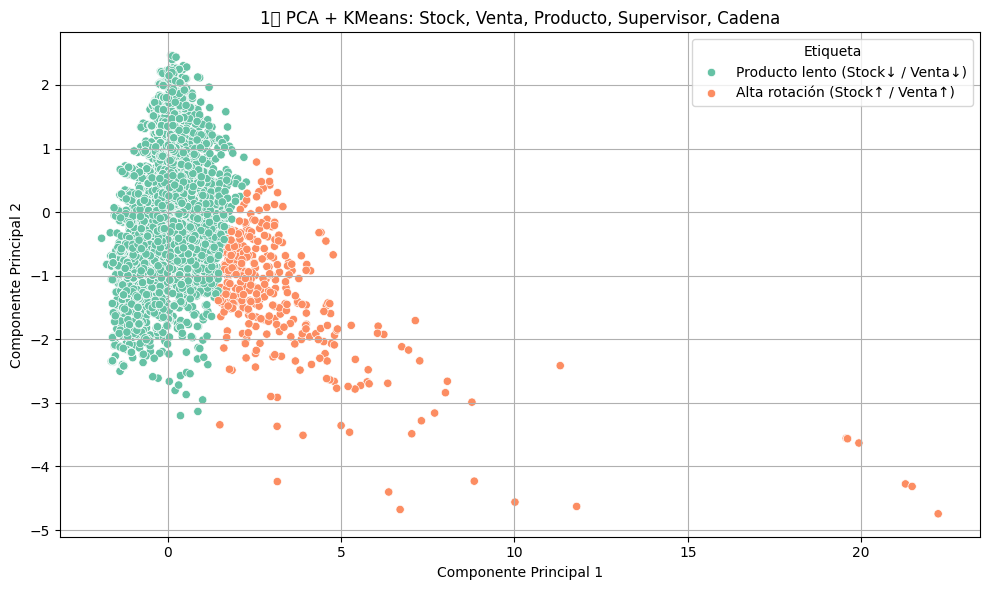

<ipython-input-25-06fee4069bb1>:87: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


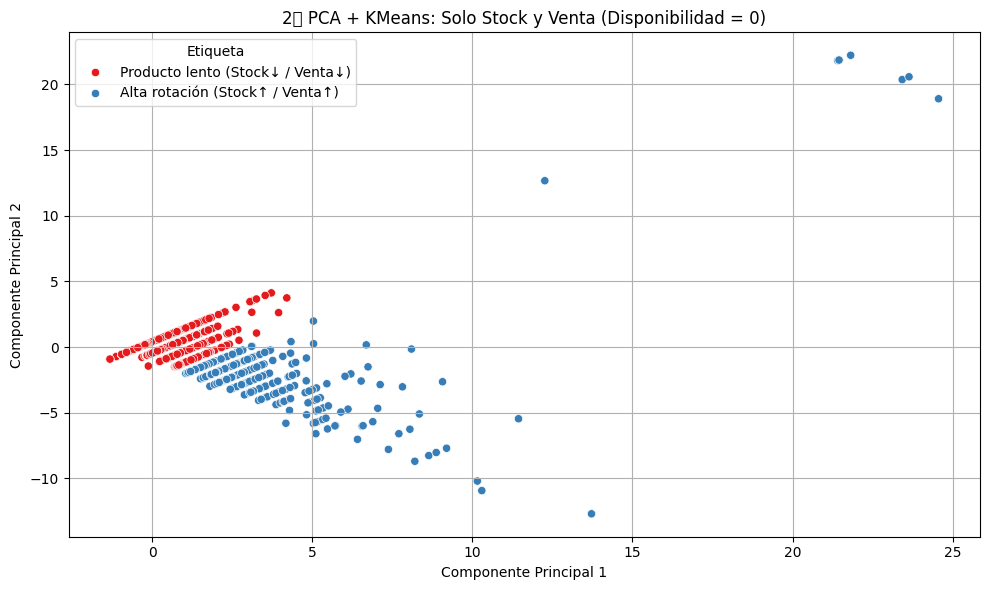

In [ ]:
# 📦 Librerías
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📥 Subir archivo
uploaded = files.upload()
df = pd.read_excel('data sciense cabritas.xlsx')  # cambia si tiene otro nombre

# 🧩 Extraer nombre de cadena desde campo "Local"
df['Cadena'] = df['Local'].str.extract(r'^(.*?) ')

# 🧠 Función para etiquetar clúster
def etiquetar_cluster(stock, venta, stock_avg, venta_avg):
    if stock > stock_avg and venta > venta_avg:
        return 'Alta rotación (Stock↑ / Venta↑)'
    elif stock > stock_avg and venta < venta_avg:
        return 'Sobrestock (Stock↑ / Venta↓)'
    elif stock < stock_avg and venta > venta_avg:
        return 'Riesgo de quiebre (Stock↓ / Venta↑)'
    else:
        return 'Producto lento (Stock↓ / Venta↓)'

# ====================
# 🔹 Análisis 1: Multivariable
# ====================
cols1 = ['Stock', 'Venta', 'Producto', 'Supervisor', 'Cadena']
df1 = df[df['Disponibilidad'] == 0][cols1].dropna().copy()

for col in ['Producto', 'Supervisor', 'Cadena']:
    df1[col] = LabelEncoder().fit_transform(df1[col])

X1 = StandardScaler().fit_transform(df1)
X1_pca = PCA(n_components=2).fit_transform(X1)
df1['Cluster'] = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X1_pca)

# 🔍 Etiquetas para los grupos
avg_stock1 = df1['Stock'].mean()
avg_venta1 = df1['Venta'].mean()
cluster_map1 = df1.groupby('Cluster')[['Stock', 'Venta']].mean().reset_index()
labels1 = {
    row['Cluster']: etiquetar_cluster(row['Stock'], row['Venta'], avg_stock1, avg_venta1)
    for _, row in cluster_map1.iterrows()
}
df1['Etiqueta'] = df1['Cluster'].map(labels1)

# 📈 Gráfico 1
plt.figure(figsize=(10,6))
sns.scatterplot(x=X1_pca[:, 0], y=X1_pca[:, 1], hue=df1['Etiqueta'], palette='Set2')
plt.title('1️⃣ PCA + KMeans: Stock, Venta, Producto, Supervisor, Cadena')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# ====================
# 🔹 Análisis 2: Solo Stock y Venta
# ====================
cols2 = ['Stock', 'Venta']
df2 = df[df['Disponibilidad'] == 0][cols2].dropna().copy()
X2 = StandardScaler().fit_transform(df2)
X2_pca = PCA(n_components=2).fit_transform(X2)
df2['Cluster'] = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X2_pca)

# 🔍 Etiquetas para los grupos
avg_stock2 = df2['Stock'].mean()
avg_venta2 = df2['Venta'].mean()
cluster_map2 = df2.groupby('Cluster')[['Stock', 'Venta']].mean().reset_index()
labels2 = {
    row['Cluster']: etiquetar_cluster(row['Stock'], row['Venta'], avg_stock2, avg_venta2)
    for _, row in cluster_map2.iterrows()
}
df2['Etiqueta'] = df2['Cluster'].map(labels2)

# 📈 Gráfico 2
plt.figure(figsize=(10,6))
sns.scatterplot(x=X2_pca[:, 0], y=X2_pca[:, 1], hue=df2['Etiqueta'], palette='Set1')
plt.title('2️⃣ PCA + KMeans: Solo Stock y Venta (Disponibilidad = 0)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

Saving data sciense cabritas.xlsx to data sciense cabritas (9).xlsx


<ipython-input-26-9d23fe6bfd73>:52: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


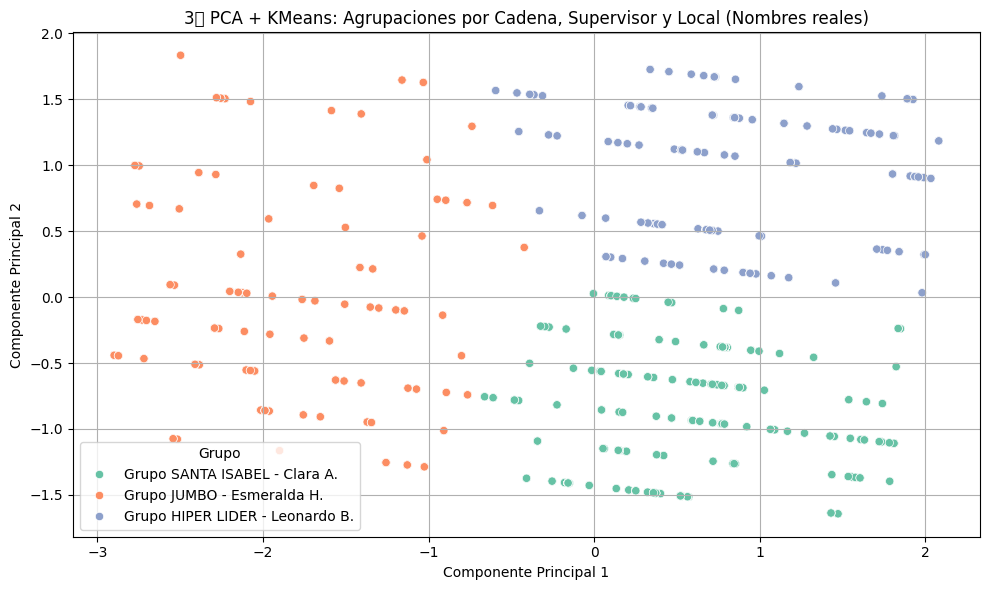

In [ ]:
# 📦 Librerías necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📥 Subir archivo Excel
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")  # ajusta el nombre si es diferente

# 🏷️ Extraer 'Cadena' desde 'Local'
df['Cadena'] = df['Local'].str.extract(r'^(.*?) ')

# 🔍 Filtrar por disponibilidad = 0 y seleccionar columnas categóricas
df_cat = df[df['Disponibilidad'] == 0][['Cadena', 'Supervisor', 'Local']].dropna().copy()

# 🔢 Codificar variables categóricas
for col in df_cat.columns:
    df_cat[col] = LabelEncoder().fit_transform(df_cat[col])

# ⚙️ Escalar y aplicar PCA
X_cat = StandardScaler().fit_transform(df_cat)
X_cat_pca = PCA(n_components=2).fit_transform(X_cat)

# 🎯 Clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cat['Cluster'] = kmeans.fit_predict(X_cat_pca)

# ➕ Recuperar columnas originales
df_origen = df[df['Disponibilidad'] == 0][['Cadena', 'Supervisor', 'Local']].dropna().reset_index(drop=True)
df_cat['Cadena'] = df_origen['Cadena']
df_cat['Supervisor'] = df_origen['Supervisor']
df_cat['Local'] = df_origen['Local']

# 🧠 Etiquetado interpretativo por grupo
df_cat['Grupo'] = df_cat['Cluster'].map({
    0: 'Grupo HIPER LIDER - Leonardo B.',
    1: 'Grupo SANTA ISABEL - Clara A.',
    2: 'Grupo JUMBO - Esmeralda H.'
})

# 📊 Visualización
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_cat_pca[:, 0], y=X_cat_pca[:, 1], hue=df_cat['Grupo'], palette='Set2')
plt.title('3️⃣ PCA + KMeans: Agrupaciones por Cadena, Supervisor y Local (Nombres reales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

Saving data sciense cabritas.xlsx to data sciense cabritas (10).xlsx


<ipython-input-27-849b82a10df9>:38: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


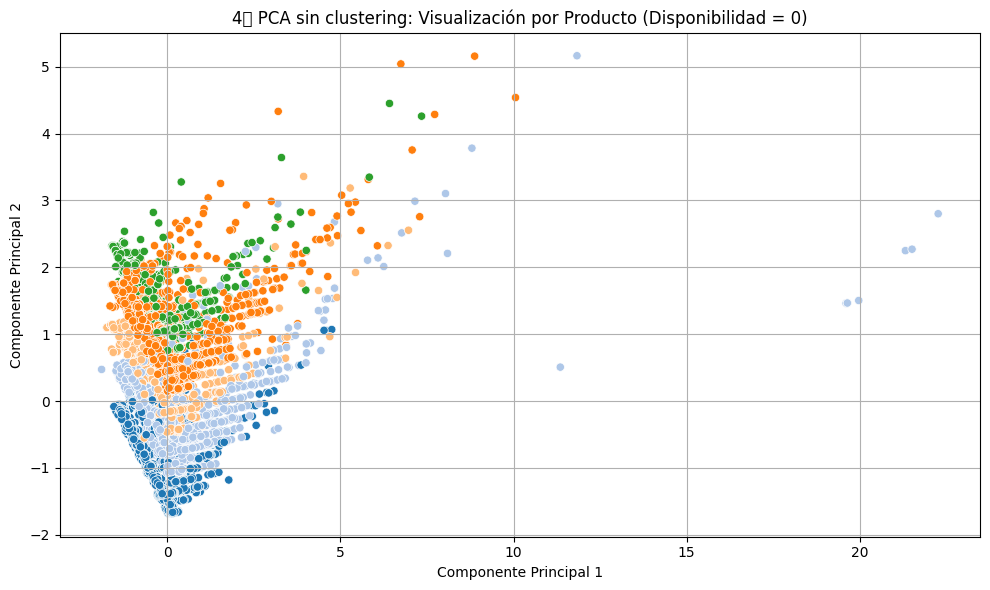

<ipython-input-27-849b82a10df9>:48: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-849b82a10df9>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


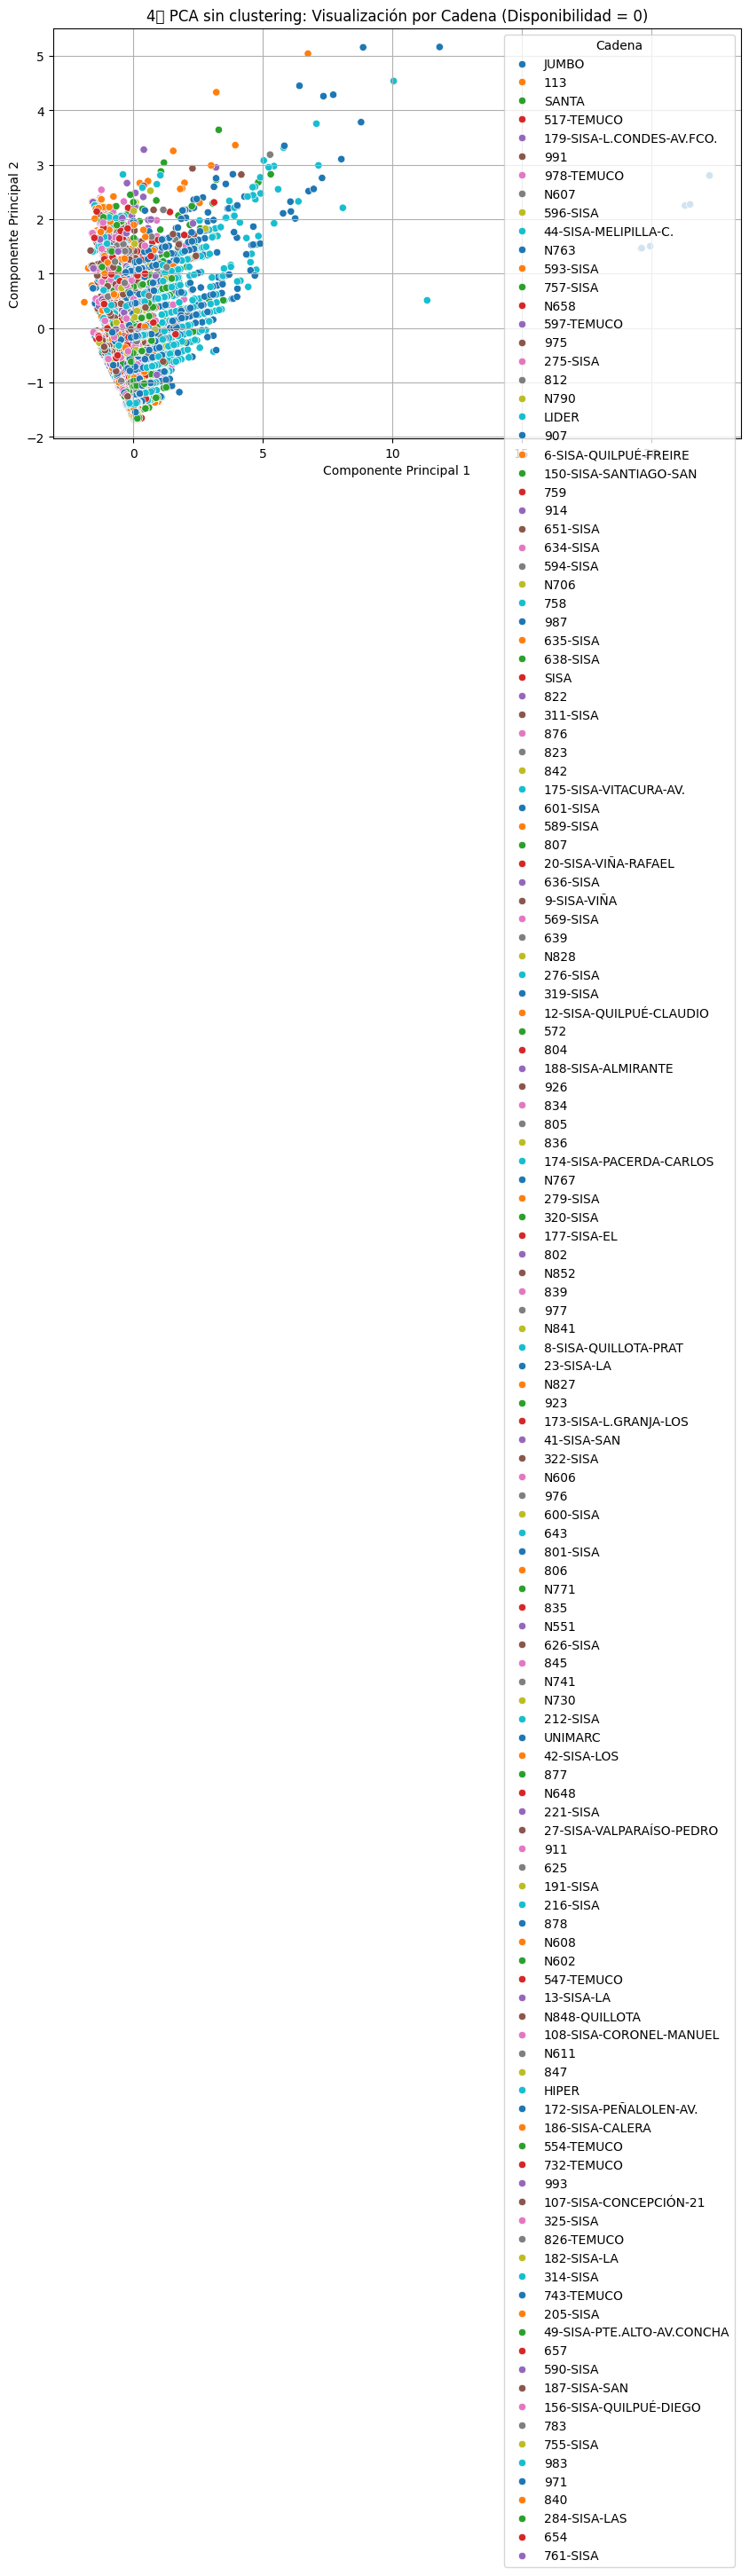

In [ ]:
# 📦 Librerías necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📥 Subir archivo
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# 🏷️ Extraer Cadena desde Local
df['Cadena'] = df['Local'].str.extract(r'^(.*?) ')

# 🔍 Filtrar disponibilidad = 0 y seleccionar columnas relevantes
df_pca_viz = df[df['Disponibilidad'] == 0][['Stock', 'Venta', 'Producto', 'Cadena']].dropna().copy()

# 🔢 Codificar variables categóricas
df_pca_viz['Producto_encoded'] = LabelEncoder().fit_transform(df_pca_viz['Producto'])
df_pca_viz['Cadena_encoded'] = LabelEncoder().fit_transform(df_pca_viz['Cadena'])

# ⚙️ Escalar y aplicar PCA
X = StandardScaler().fit_transform(df_pca_viz[['Stock', 'Venta', 'Producto_encoded', 'Cadena_encoded']])
X_pca = PCA(n_components=2).fit_transform(X)

# Agregar componentes al DataFrame
df_pca_viz['PC1'] = X_pca[:, 0]
df_pca_viz['PC2'] = X_pca[:, 1]

# 📊 Gráfico 1: por Producto
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca_viz, x='PC1', y='PC2', hue='Producto', legend=False, palette='tab20')
plt.title('4️⃣ PCA sin clustering: Visualización por Producto (Disponibilidad = 0)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Gráfico 2: por Cadena
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca_viz, x='PC1', y='PC2', hue='Cadena', palette='tab10')
plt.title('4️⃣ PCA sin clustering: Visualización por Cadena (Disponibilidad = 0)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()